### Agent Code for TIC TAC

In [1]:
import collections
import numpy as np
import random as ran
import pickle
import collections
from matplotlib import pyplot as plt
import time
from TCGame_Env import TicTacToe

#### Agent class with various functions 

In [2]:
class Qlearning:
    def __init__(self, epsilon=0.2, eps_decay = 0, alpha=0.3, gamma=0.9, values=[]):
        self.epsilon=epsilon
        self.eps_decay = eps_decay
        self.alpha=alpha
        self.gamma=gamma
        self.values = values
        self.Q = {} 
        self.options = []
        self.last_board = None
        self.state_action_last = None
        
    def start(self):
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        self.States_track = {} 
        self.options = self.values.copy()

    def return_move(self, possible_moves):
        move = ran.choice(possible_moves) 
        self.state_action_last=(self.last_board,move)
        self.q_last=self.get_Q_states(self.last_board,move)
        return move
    
    def return_possible_move(self, possible_moves):
        Q_list=[]
        for action in possible_moves:
            Q_list.append(self.get_Q_states(self.last_board,action))
        maxQ=max(Q_list)
        if Q_list.count(maxQ) > 1:
            best_options = [i for i in range(len(possible_moves)) if Q_list[i] == maxQ]
            i = ran.choice(best_options)
        else:
            i = Q_list.index(maxQ)
        self.state_action_last = (self.last_board, possible_moves[i])
        self.q_last = self.get_Q_states(self.last_board, possible_moves[i])
        
        return possible_moves[i]
    
    def epslion_greedy_strategy_with_decay(self, state, possible_moves):
        self.last_board = tuple(state)
        if(ran.random() < self.epsilon):
            action =  self.return_move(possible_moves)
        else:
            action = self.return_possible_move(possible_moves)
            
        self.epsilon *= (1.-self.eps_decay) #decay epsilon
        return action

    def get_Q_states(self, state, action): 
        if(self.Q.get((state,action))) is None:
            self.Q[(state,action)] = 1.0
        return self.Q.get((state,action))

    def update_Q_states(self, reward, state, possible_moves):
        q_list=[]
        for moves in possible_moves:
            q_list.append(self.get_Q_states(tuple(state), moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next = 0.0
        self.Q[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)

    def save_Q_states(self, file_name): 
        with open(file_name +'.pkl', 'wb') as handle:
            pickle.dump(self.Q, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print(len(self.Q.keys())) 

    def load_Q_states(self, file_name): 
        with open(file_name + '.pkl', 'rb') as handle:
            self.Q = pickle.load(handle)

##### Initialize players

In [3]:
odd_player = Qlearning(values=[1,3,5,7,9]) 
even_player = Qlearning(values=[2,4,6,8])

In [4]:
game = TicTacToe() 
episodes = 3000000
#train for episodes
game.start_training(odd_player, even_player, episodes)
game.save_states()  #save state

Training Started
initialize tracking state
Training is completed
9267081
5545546


In [5]:
odd_player, even_player = game.get_q_values()

In [6]:
odd_player

{((0, 0, 0, 0, 0, 0, 0, 0, 0), 1): -1.9926887784621412,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 2): -0.10050803849604381,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 3): -5.084002469031972,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 4): -2.56331164150138,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 5): -4.799121538731848,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 6): -3.4282893826091345,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 7): -2.21278540268599,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 8): -4.690124273482482,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 9): -3.5965335300578323,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 1): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 2): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 3): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 4): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 5): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 6): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 7): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 9): 1.0,
 ((0, 0, 0, 0, 0, 0, 4, 5, 0), 1): -4.614586399623991,
 ((0, 0, 0, 0, 0, 0, 4, 5, 0), 2): -2.431153098438826,
 ((0, 0, 0, 0, 0, 0, 4, 5, 0), 3): -3.2794096061336075,
 ((0, 0, 0, 0, 0

#### 4 observations with respect to Q values for states

In [7]:
print (odd_player[((0, 0, 0, 0, 0, 0, 0, 0, 0), 1)])
print (odd_player[((0, 0, 0, 0, 0, 0, 0, 0, 0), 8)])
print (odd_player[((0, 4, 7, 0, 0, 0, 0, 0, 0), 5)])
print (odd_player[((0, 4, 7, 0, 0, 0, 0, 0, 0), 8)])
print (odd_player[((0, 0, 6, 5, 0, 0, 0, 0, 0), 5)])
print (odd_player[((0, 2, 0, 0, 8, 0, 0, 3, 1), 6)])

-1.9926887784621412
-4.690124273482482
-5.204812091006572
-7.9291354792486635
-4.649621452159194
-1.9811879989999996


In [8]:
with open('odd_q_states.pkl', 'rb') as handle:
    oddstates = pickle.load(handle)  
print(len(oddstates))

9267081


In [9]:
with open('States_tracked.pkl', 'rb') as handle:
    States_track = pickle.load(handle)  
print(len(States_track))

6


In [10]:
print(States_track)

defaultdict(<class 'dict'>, {(0, 0, 0, 0, 0, 0, 0, 0, 0): {1: [], 8: []}, (0, 0, 6, 0, 0, 0, 0, 5, 0): {2: [0.43899999999999995, 1.1613139000000001, 0.7829197300000001, 0.7829197300000001, 0.7829197300000001, 0.5180438110000001, 0.5180438110000001, 0.5180438110000001, 5.7219890271730005, 3.9753923190211005, 1.7168511870578764, 1.7168511870578764, 1.3372581790088174, 1.3372581790088174, 1.3372581790088174, 1.3372581790088174, 0.9060807253061722, 6.0029795554000245, 4.172085688780017, 4.172085688780017, 2.928009441713258, 2.0196066091992804, 1.3837246264394962, 1.3837246264394962, 1.3837246264394962, 1.3837246264394962, 2.9370250669553535, 4.071089718575981, 0.901478641430093, 0.901478641430093, 0.901478641430093, 0.901478641430093, 0.901478641430093, 1.860507174010522, 3.1196177724799266, 3.8830211590207018, 3.16632338028087, 2.186426366196609, 2.186426366196609, 2.186426366196609, 2.186426366196609, 2.186426366196609, 1.5004984563376262, 1.5004984563376262, 1.5004984563376262, 1.500498

##### Convergence Around state-action pair

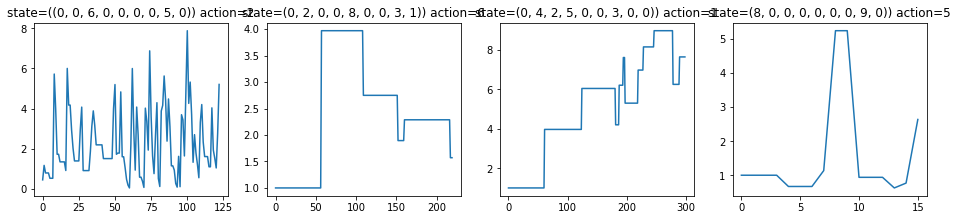

In [11]:
xaxis = np.asarray(range(0, len((States_track[(0, 0, 6, 0, 0, 0, 0, 5, 0)][2]))))
plt.figure(0, figsize=(16,7))
plt.subplot(241)
plt.title('state=((0, 0, 6, 0, 0, 0, 0, 5, 0)) action=2')
plt.plot(xaxis,np.asarray(States_track[(0, 0, 6, 0, 0, 0, 0, 5, 0)][2]))


xaxis = np.asarray(range(0, len((States_track[(0, 2, 0, 0, 8, 0, 0, 3, 1)][6]))))
plt.subplot(242)
plt.title('state=(0, 2, 0, 0, 8, 0, 0, 3, 1)) action=6')
plt.plot(xaxis,np.asarray(States_track[(0, 2, 0, 0, 8, 0, 0, 3, 1)][6]))


xaxis = np.asarray(range(0, len((States_track[(0, 4, 2, 5, 0, 0, 3, 0, 0)][1]))))
plt.subplot(243)
plt.title('state=(0, 4, 2, 5, 0, 0, 3, 0, 0)) action=1')
plt.plot(xaxis,np.asarray(States_track[(0, 4, 2, 5, 0, 0, 3, 0, 0)][1]))

xaxis = np.asarray(range(0, len((States_track[(8, 0, 0, 0, 0, 0, 0, 9, 0)][5]))))
plt.subplot(244)
plt.title('state=(8, 0, 0, 0, 0, 0, 0, 9, 0)) action=5')
plt.plot(xaxis,np.asarray(States_track[(8, 0, 0, 0, 0, 0, 0, 9, 0)][5]))
